In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


In [2]:
def read_file(dataFrame, input_file_path, race_code, year):
        try:
            temp_df = pd.read_excel (input_file_path, sheet_name = 'education', 
            names=['Characteristic','Value Type', 'Total, 25 years and over','Less than 9th grade','9th to 12th grade, no diploma','High school graduate (includes equivalency)',	'Some college, no degree','Associate degree','Bachelors degree or more','Bachelors degree','Masters degree','Professional degree','Doctorate degree'],
            header=None,
            skiprows=43,
            index_col=None,
            usecols="A,B,C:M")
            temp_df["Race"] = race_code
            temp_df["Year"] = year
            temp_df.fillna(method='ffill', inplace=True)
            frames = [dataFrame, temp_df]
            dataFrame = pd.concat(frames, ignore_index=True)
            temp_df["Characteristic"] = temp_df["Characteristic"].str.replace('\n','')
            temp_df["Value Type"]     = temp_df["Value Type"].str.replace('\n','')
        except:
            print("Error while trying to read in file ", input_file_path)
        finally:
            return(dataFrame)

In [3]:
try:
    del df
except NameError:
    pass

df = pd.DataFrame()
#----------------------------- 2019 ---------------------------------------------------------#
#2019 - 
df = read_file(df, os.path.join('.', 'Resources', '2019_Asian.xlsx'),  "Asian", 2019)
df = read_file(df, os.path.join('.', 'Resources', '2019_Black.xlsx'),  "Black", 2019)
df = read_file(df, os.path.join('.', 'Resources', '2019_Hispanic.xlsx'),  "Hispanic", 2019)
df = read_file(df, os.path.join('.', 'Resources', '2019_White.xlsx'),  "White", 2019)
df = read_file(df, os.path.join('.', 'Resources', '2018_Asian.xls'),  "Asian", 2018)
df = read_file(df, os.path.join('.', 'Resources', '2018_Black.xls'),  "Black", 2018)
df = read_file(df, os.path.join('.', 'Resources', '2018_Hispanic.xls'),  "Hispanic", 2018)
df = read_file(df, os.path.join('.', 'Resources', '2018_White.xls'),  "White", 2018)

In [4]:
df = df[['Characteristic','Value Type', 'Race', 'Year','Total, 25 years and over','Less than 9th grade','9th to 12th grade, no diploma','High school graduate (includes equivalency)','Some college, no degree','Associate degree','Bachelors degree or more','Bachelors degree','Masters degree','Professional degree','Doctorate degree']]
df

,Characteristic,Value Type,Race,Year,"Total, 25 years and over",Less than 9th grade,"9th to 12th grade, no diploma",High school graduate (includes equivalency),"Some college, no degree",Associate degree,Bachelors degree or more,Bachelors degree,Masters degree,Professional degree,Doctorate degree
0,Median income,Value (Dol.),Asian,2019,115099.0000,46873.0000,49102.0000,65480.0000,81865.0000,89974.0000,145352.0000,121901.0000,165561.000,204975,176318
1,Median income,Standard error (Dol.),Asian,2019,3103.0000,7223.0000,7518.0000,4125.0000,8058.0000,9430.0000,4474.0000,6146.0000,6749.000,26988,9339
2,Mean income,Value (Dol.),Asian,2019,151082.0000,59445.0000,87637.0000,86598.0000,101147.0000,105293.0000,182326.0000,152212.0000,209252.000,247197,224646
3,Mean income,Standard error (Dol.),Asian,2019,3335.0000,6229.0000,21269.0000,5038.0000,5750.0000,7276.0000,4442.0000,5224.0000,9149.000,26734,15477
4,Gini ratio,Ratio,Asian,2019,0.4440,0.4180,0.5330,0.4270,0.3710,0.3740,0.4110,0.4020,0.403,0.413,0.374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Mean income,Standard\nerror (Dol.),White,2018,789.0000,1487.0000,1320.0000,1088.0000,1307.0000,1906.0000,1623.0000,1857.0000,2804.000,9674,7542
60,Gini ratio,Ratio,White,2018,0.4410,0.4200,0.4430,0.4180,0.3860,0.3780,0.3980,0.3960,0.371,0.415,0.411
61,Gini ratio,Standard\nerror,White,2018,0.0027,0.0119,0.0114,0.0061,0.0055,0.0095,0.0039,0.0048,0.007,0.0135,0.0142
62,Income per\nfamily member,Value\n(Dol.),White,2018,36068.0000,12755.0000,14989.0000,26250.0000,30532.0000,32501.0000,51633.0000,46661.0000,53789.000,83350,72575


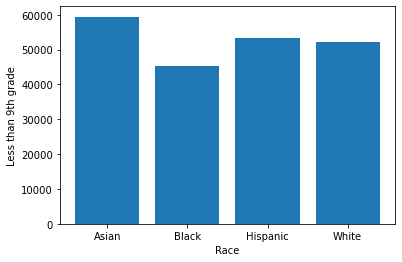

In [9]:
plt.bar(df.iloc[:,2],df.iloc[:,5])
plt.xlabel('Race')
plt.ylabel('Less than 9th grade')
plt.savefig("BarChart1")
plt.show()


In [6]:
df_grouped = df.groupby('Race').sum()[[ 'Total, 25 years and over','Less than 9th grade','9th to 12th grade, no diploma',	'High school graduate (includes equivalency)',	'Some college, no degree','Associate degree','Bachelors degree or more','Bachelors degree',	'Masters degree']]
df_grouped

,"Total, 25 years and over",Less than 9th grade,"9th to 12th grade, no diploma",High school graduate (includes equivalency),"Some college, no degree",Associate degree,Bachelors degree or more,Bachelors degree,Masters degree
Race,,,,,,,,,
Asian,605200.9120,263800.9160,339821.1420,349502.8896,429853.7771,490807.8715,759669.8425,654265.8304,864925.8144
Black,320236.9419,179958.9319,175382.0015,232830.9267,285689.8792,328374.8071,523862.8332,472159.8156,591015.8039
Hispanic,321339.8991,215187.8556,221837.8996,279280.8387,354447.8339,366878.7992,543649.8475,492737.8338,646044.8278
White,486620.8907,213183.8618,229771.8999,345462.8291,424495.8168,445142.7709,701124.8132,644781.7975,733376.7795


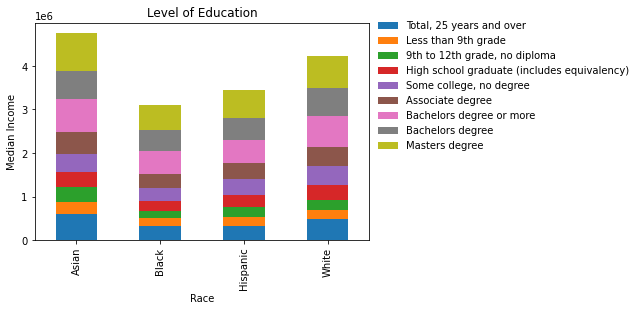

<Figure size 432x288 with 0 Axes>

In [7]:
df_grouped.plot(kind="bar",stacked=True, title="Education").legend(ncol = 1, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title("Level of Education")
plt.ylabel("Median Income")
plt.xlabel("Race")

plt.show()
plt.tight_layout()

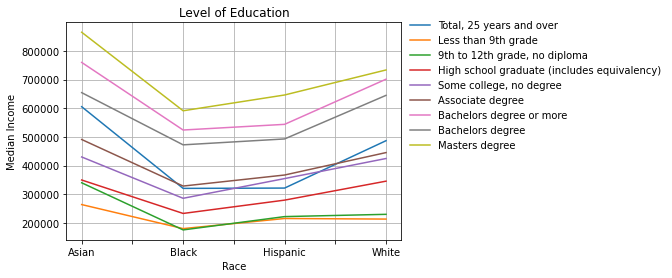

<Figure size 432x288 with 0 Axes>

In [8]:
df_grouped.plot(kind="line", title="Education").legend(ncol = 1, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title("Level of Education")
plt.ylabel("Median Income")
plt.xlabel("Race")

plt.grid(True)
plt.show()
plt.tight_layout()